In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix 
import seaborn as sns
from sklearn import metrics
import numpy as np
from keras import models
from keras import layers
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras import backend as K
%matplotlib inline

In [2]:
datos = pd.read_excel("DatosLimpios_AllFeatures.xlsx", names=["rango1","rango2","rango3","rango4","rango5","Femenino","Masculino",'Animado', 'Confiable', 'Extravertido', 'Responsable', 'Serio','estilo'])
datos

,rango1,rango2,rango3,rango4,rango5,Femenino,Masculino,Animado,Confiable,Extravertido,Responsable,Serio,estilo
5,0,1,0,0,0,0,1,1,0,0,0,0,1
6,0,1,0,0,0,0,1,0,0,0,1,0,1
11,0,0,0,0,1,1,0,0,0,0,0,1,1
12,0,0,1,0,0,0,1,0,0,0,0,1,1
13,0,1,0,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2197,0,0,0,1,0,1,0,0,0,0,1,0,0
2200,0,0,0,0,1,0,1,0,1,0,0,0,0
2201,1,0,0,0,0,1,0,1,0,0,0,0,1
2204,0,0,1,0,0,0,1,1,0,0,0,0,1


In [3]:
datos = datos.values
X = datos[:, :-1]
y = datos[:,-1]

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 101)

In [5]:

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [6]:

from sklearn.metrics import confusion_matrix
# Start neural network
network = models.Sequential()

# Add fully connected layer with a ReLU activation function
network.add(layers.Dense(units=12, activation='relu', input_shape=(12,)))
network.add(layers.Dense(units=6))
# Add fully connected layer with a sigmoid activation function
network.add(layers.Dense(units=1,activation='sigmoid'))


# Compile neural network
network.compile(loss='binary_crossentropy', #mean_squared_error
                    optimizer='Adam', # Root Mean Square Propagation
                    metrics=['accuracy',f1_m,precision_m, recall_m]) # Accuracy performance metric
# Return compiled network
Hist=network.fit(X_train, y_train, epochs=100, batch_size=10)


Epoch 1/100
53/53 [==============================] - 2s 3ms/step - loss: 0.6664 - accuracy: 0.5802 - f1_m: 0.5643 - precision_m: 0.5840 - recall_m: 0.5908
Epoch 2/100
53/53 [==============================] - 0s 3ms/step - loss: 0.6360 - accuracy: 0.6336 - f1_m: 0.6730 - precision_m: 0.6335 - recall_m: 0.7575
Epoch 3/100
53/53 [==============================] - 0s 4ms/step - loss: 0.6153 - accuracy: 0.6489 - f1_m: 0.6709 - precision_m: 0.6502 - recall_m: 0.7350
Epoch 4/100
53/53 [==============================] - 0s 5ms/step - loss: 0.5952 - accuracy: 0.6908 - f1_m: 0.7297 - precision_m: 0.6730 - recall_m: 0.8391
Epoch 5/100
53/53 [==============================] - 0s 3ms/step - loss: 0.5766 - accuracy: 0.7137 - f1_m: 0.7467 - precision_m: 0.7049 - recall_m: 0.8277
Epoch 6/100
53/53 [==============================] - 0s 3ms/step - loss: 0.5597 - accuracy: 0.7252 - f1_m: 0.7504 - precision_m: 0.7131 - recall_m: 0.8227
Epoch 7/100
53/53 [==============================] - 0s 2ms/step - los

In [7]:
# Evaluacion del modelo con los datos de prueba
scores = network.evaluate(X_test, y_test, verbose=0)
# Presentacion de Accurary del modelo
print("\n%s: %.2f%%" % (network.metrics_names[1], scores[1]*100))
# Presentacion de F1 del modelo
print("\n%s: %.2f%%" % (network.metrics_names[2], scores[2]*100))
# Presentacion de la Precision del modelo
print("\n%s: %.2f%%" % (network.metrics_names[3], scores[3]*100))
# Presentacion del Recall del modelo
print("\n%s: %.2f%%" % (network.metrics_names[4], scores[4]*100))


accuracy: 64.44%

f1_m: 60.26%

precision_m: 55.45%

recall_m: 69.32%


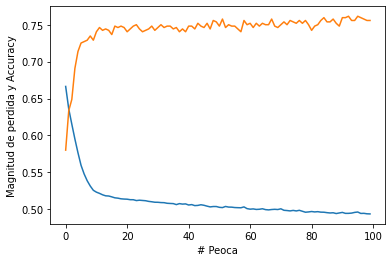

In [8]:
plt.xlabel("# Peoca")
plt.ylabel("Magnitud de perdida y Accuracy")
plt.plot(Hist.history["loss"])
plt.plot(Hist.history["accuracy"])

In [9]:
# Se obtiene los valores de prediccion y se grafica la 
# matriz de confusion
y_pred = network.predict(X_test)
y_pred =(y_pred>0.5)
list(y_pred)
cm = confusion_matrix(y_test, y_pred)
cm

array([[53, 55],
       [25, 92]])

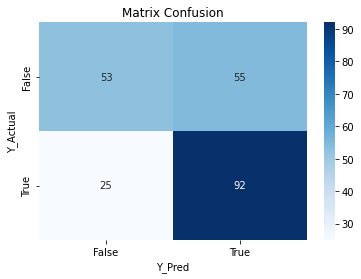

In [10]:
#Graficacion de la matriz de confusion
ax = sns.heatmap(cm, annot=True, cmap='Blues')
# etiquetas de X e Y
ax.set_title('Matrix Confusion');
ax.set_xlabel('Y_Pred')
ax.set_ylabel('Y_Actual');

# Sub etiquetas de X e Y
ax.xaxis.set_ticklabels(["False","True"])
ax.yaxis.set_ticklabels(["False","True"])

# Se manda a visuluzar la matriz de confusion.
plt.show()

In [11]:
# Se establece la funcion de la red neuronal para ser utilizada por el 
# CrossFolding
def create_network():
    network = models.Sequential()
    network.add(layers.Dense(units=12, activation='relu', input_shape=(12,)))
    network.add(layers.Dense(units=6))
    network.add(layers.Dense(units=1,activation='sigmoid'))
    network.compile(loss='binary_crossentropy', #mean_squared_error
                    optimizer='Adam', # Root Mean Square Propagation
                    metrics=['accuracy',f1_m,precision_m, recall_m]) # Accuracy performance metric 
    return network

In [12]:
neural_network = KerasClassifier(build_fn=create_network, 
                                 epochs=200, 
                                 batch_size=10, 
                                 verbose=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  after removing the cwd from sys.path.


In [13]:
# Evaluate neural network using three-fold cross-validation
cross_val_score(neural_network, X_test, y_test, cv=3)

array([0.62666667, 0.65333331, 0.57333332])

In [14]:
# Rango1 17-19
# Rango2 20-22
# Rango3 23-24
# Rango4 25 27
# Rango5 28-30

X_new = pd.DataFrame({'rango1': [1],'rango2': [0],'rango3': [0],'rango4': [0],'rango5': [0],
                      'Femenino': [0],'Masculino': [1],
                      'Animado': [0], 'Confiable': [0], 'Extravertido': [0], 'Responsable': [1], 'Serio': [0]})


In [15]:
# Se pasan los valores de entrada a la red, y esta se encarga de predecir el estilo a vestir

Resultado= network.predict([X_new])
out= Resultado.round().astype(int)
if out == 1:
  print("Su estilo es casual")
if out == 0:
  print("Su estilo es modesto")


Su estilo es modesto
